# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, auc, mean_squared_error, average_precision_score, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, mean_absolute_error, r2_score, classification_report, plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from IPython.display import Image  
import graphviz 
import pydotplus
import seaborn as sns        

import xgboost as xgb
import joblib

from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)

#Setting warning filters
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Model = []
Accuracy= []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []
def calculateScore(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen.append(TP / (TP + FN))
    Spe.append(TN / (FP + TN))
    FPR.append(FP / (FP + TN))
    FNR.append(FN / (FN + TP))

# Data Prep

In [ ]:
ls "drive/MyDrive/IDS575.38069 Machine Learning/PROJECT/575 datasets/"

ls: cannot access 'drive/MyDrive/IDS575.38069 Machine Learning/PROJECT/575 datasets/': No such file or directory


In [ ]:
df=pd.read_csv('drive/MyDrive/OnlineNewsPopularity.csv')
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [ ]:
df.shape

(39644, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
# removing duplicates
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
df=df.drop(['url',' timedelta'],axis=1)
df=df[df[' shares']<3000]

In [ ]:
# Drop these items or rows with n_tokens_content = 0

df = df[df[' n_tokens_content'] != 0] 

In [ ]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29557.000000,29557.000000,29557.000000,2.955700e+04,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000,29557.000000
mean,10.415367,557.765842,0.547192,1.000000e+00,0.695015,10.680110,3.356125,4.234225,1.195825,4.692786,7.155834,0.051020,0.189735,0.168353,0.051392,0.184288,0.238861,26.267720,1100.349689,304.137030,12934.063335,750383.313597,252099.498788,1048.424425,5301.693775,2972.740102,3436.606189,9192.998165,5612.327495,0.169131,0.191799,0.192002,0.188348,0.143959,0.053964,0.060798,0.114761,0.184831,0.145504,0.236881,0.196708,0.236076,0.451626,0.121017,0.040395,0.017052,0.701148,0.298716,0.362262,0.098415,0.774544,-0.264244,-0.532631,-0.109776,0.273089,0.065637,0.342086,0.149321,1313.243259
std,2.104632,451.105202,0.100492,3.973646e-09,0.098830,10.498878,3.767311,7.933949,4.047511,0.281861,1.926764,0.220042,0.392098,0.374186,0.220800,0.387725,0.426395,69.778512,3621.147923,582.640560,58247.323963,217287.104207,130182.547335,1078.795541,5460.027721,1175.236091,17943.687660,37471.473544,22167.044935,0.374874,0.393722,0.393881,0.390996,0.351054,0.225950,0.238963,0.318739,0.262191,0.224937,0.294825,0.278006,0.288771,0.087700,0.095264,0.016250,0.010518,0.151535,0.151355,0.084744,0.069622,0.212992,0.119344,0.279640,0.092861,0.318236,0.256938,0.189045,0.219153,608.336985
min,2.000000,24.000000,0.114964,9.999999e-01,0.123214,0.000000,0.000000,0.000000,0.000000,3.624585,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.018182,0.018182,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,263.000000,0.479032,1.000000e+00,0.635236,5.000000,1.000000,1.000000,0.000000,4.500554,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,140.125000,0.000000,843300.000000,171010.000000,0.000000,3498.957378,2318.003129,665.000000,1100.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025088,0.025017,0.028572,0.025311,0.028580,0.397135,0.061963,0.028933,0.010116,0.608696

In [ ]:
df[' shares'].median()

1200.0

In [ ]:
# Classification
def rng(x):
  if x<=1200:
    y=0
  else :
    y=1 
  return y

df['rng']=df.apply(lambda x: rng(x[' shares']),axis =1)
fcolsc=df.columns.drop([' shares','rng'])
Y=df['rng'].values
X=df[fcolsc].values
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

 # .

# .

# DT Classifier

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)  # improved
dtc = dtc.fit(X_trainc, y_trainc)


In [ ]:
y_preddtc = dtc.predict(X_testc)
y_probdtc = dtc.predict_proba(X_testc)
y_preddtc

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
a=pd.DataFrame(y_preddtc,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==0]
a2=a[a['y']==1]

print(a.shape, a[a['pred']==a['y']].shape, '\n', a1.shape, a1[a1['pred']==a1['y']].shape, '\n', a2.shape, a2[a2['pred']==a2['y']].shape)

(8868, 2) (5008, 2) 
 (4934, 2) (2936, 2) 
 (3934, 2) (2072, 2)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_testc, y_preddtc))
print('Precision: %.3f' % precision_score(y_testc, y_preddtc))
print('Recall: %.3f' % recall_score(y_testc, y_preddtc))
print('F1 Score: %.3f' % f1_score(y_testc, y_preddtc))


Accuracy: 0.5647271087054578
Precision: 0.509
Recall: 0.527
F1 Score: 0.518


In [ ]:
importance = list(dtc.feature_importances_)
fea_dfdtc = pd.DataFrame({'columns':fcolsc,'importance':importance})
fea_dfdtc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfdtc.reset_index(drop=True,inplace=True)
# display(fea_dfdtc)
fea_dfdtc.head()

,columns,importance
0,self_reference_avg_sharess,0.043441
1,average_token_length,0.040393
2,kw_avg_avg,0.038581
3,kw_avg_max,0.034115
4,kw_max_avg,0.033476


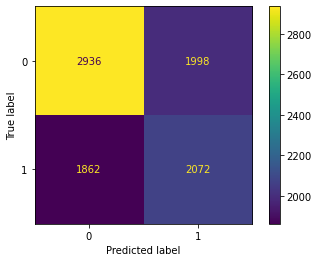

In [ ]:
plot_confusion_matrix(dtc,X_testc, y_testc)

In [ ]:
print(metrics.classification_report(y_testc, y_preddtc, digits=3))

              precision    recall  f1-score   support

           0      0.612     0.595     0.603      4934
           1      0.509     0.527     0.518      3934

    accuracy                          0.565      8868
   macro avg      0.561     0.561     0.561      8868
weighted avg      0.566     0.565     0.565      8868



# .

# .

# RF Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                       class_weight=None, ccp_alpha=0.0, max_samples=None)

rfc.fit(X_trainc, y_trainc)
print(rfc.predict(X_testc))

[0 0 0 ... 0 1 1]


In [ ]:
y_predrf=rfc.predict(X_testc)
a=pd.DataFrame(y_predrf,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==0]
a2=a[a['y']==1]

print(a.shape, a[a['pred']==a['y']].shape, '\n', a1.shape, a1[a1['pred']==a1['y']].shape, '\n', a2.shape, a2[a2['pred']==a2['y']].shape)

(8868, 2) (5822, 2) 
 (4934, 2) (3761, 2) 
 (3934, 2) (2061, 2)


In [ ]:
y_pred_prob=rfc.predict_proba(X_testc)
a=pd.DataFrame(y_pred_prob,columns=['y0','y1'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
for i in range(10):
  a['pred'] = a['y0'].apply(lambda x: 0 if x >= (0.1*i) else 1)
  print(i, a[a['pred']==a['y']].shape, a[a['pred']!=a['y']].shape, a[a['pred']==0].shape)

0 (4934, 4) (3934, 4) (8868, 4)
1 (4950, 4) (3918, 4) (8852, 4)
2 (5050, 4) (3818, 4) (8716, 4)
3 (5311, 4) (3557, 4) (8237, 4)
4 (5571, 4) (3297, 4) (7363, 4)
5 (5822, 4) (3046, 4) (5634, 4)
6 (5507, 4) (3361, 4) (3309, 4)
7 (4805, 4) (4063, 4) (1489, 4)
8 (4240, 4) (4628, 4) (496, 4)
9 (3976, 4) (4892, 4) (48, 4)


In [ ]:
# get_params(deep=True)
print(rfc.predict(X_testc))
print(rfc.predict_log_proba(X_testc))
print(rfc.predict_proba(X_testc))
print(rfc.score(X_testc, y_testc, sample_weight=None))
print("Accuracy:",accuracy_score(y_testc, y_predrf))
print('Precision: %.3f' % precision_score(y_testc, y_predrf))
print('Recall: %.3f' % recall_score(y_testc, y_predrf))
print('F1 Score: %.3f' % f1_score(y_testc, y_predrf))
# set_params(**params)

[0 0 0 ... 0 1 1]
[[-0.52763274 -0.89159812]
 [-0.41551544 -1.07880966]
 [-0.63487827 -0.75502258]
 ...
 [-0.27443685 -1.42711636]
 [-1.10866262 -0.40047757]
 [-0.89159812 -0.52763274]]
[[0.59 0.41]
 [0.66 0.34]
 [0.53 0.47]
 ...
 [0.76 0.24]
 [0.33 0.67]
 [0.41 0.59]]
0.6565178168696436
Accuracy: 0.6565178168696436
Precision: 0.637
Recall: 0.524
F1 Score: 0.575


In [ ]:
importance = list(rfc.feature_importances_)
fea_dfrfc = pd.DataFrame({'columns':fcolsc,'importance':importance})
fea_dfrfc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfrfc.reset_index(drop=True,inplace=True)
# display(fea_dfrfc)
fea_dfrfc.head()

,columns,importance
0,kw_avg_avg,0.037037
1,kw_max_avg,0.032748
2,LDA_02,0.030845
3,LDA_04,0.030729
4,kw_avg_max,0.030145


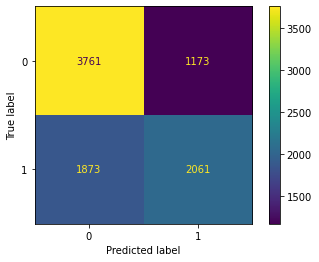

In [ ]:
plot_confusion_matrix(rfc, X_testc, y_testc)

In [ ]:
print(metrics.classification_report(y_testc, y_predrf, digits=3))


              precision    recall  f1-score   support

           0      0.668     0.762     0.712      4934
           1      0.637     0.524     0.575      3934

    accuracy                          0.657      8868
   macro avg      0.652     0.643     0.643      8868
weighted avg      0.654     0.657     0.651      8868



# .

# .

# XGBoost

In [ ]:
eval_set = [(X_trainc,y_trainc),(X_testc,y_testc)]

gbm =xgb.XGBClassifier(colsample_bytree=0.7124764668841469, gamma=2,  n_jobs=-1, learning_rate=0.015, max_depth=3, min_child_weight=5,
                       n_estimators=200, objective='binary:logistic', random_state=0, reg_alpha=0.614806300623195,
                       reg_lambda=0.561957773132362, subsample=0.7487974845003919)

gbm.fit(X_trainc,y_trainc,eval_metric= "logloss",verbose=False,eval_set=eval_set)


XGBClassifier(colsample_bytree=0.7124764668841469, gamma=2, learning_rate=0.015,
              min_child_weight=5, n_estimators=200, n_jobs=-1,
              reg_alpha=0.614806300623195, reg_lambda=0.561957773132362,
              subsample=0.7487974845003919)

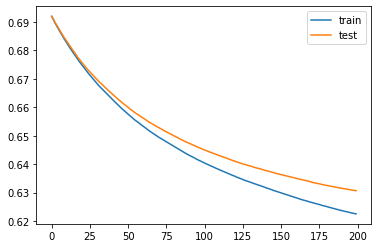

In [ ]:
%matplotlib inline
results = gbm.evals_result()
fig, ax = plt.subplots()

ax.plot(results['validation_0']['logloss'],label="train")
ax.plot(results['validation_1']['logloss'],label="test")
ax.legend(loc="upper right")


In [ ]:
#prediction 
train_pred_prob = gbm.predict_proba(X_trainc,ntree_limit=100)
test_pred_prob = gbm.predict_proba(X_testc,ntree_limit=100)

In [ ]:
y_pred_prob = gbm.predict_proba(X_testc,ntree_limit=100)
a=pd.DataFrame(y_pred_prob,columns=['y0','y1'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
for i in range(10):
  a['pred'] = a['y0'].apply(lambda x: 0 if x >= (0.1*i) else 1)
  print(i, a[a['pred']==a['y']].shape, a[a['pred']!=a['y']].shape, a[a['pred']==0].shape)

0 (4934, 4) (3934, 4) (8868, 4)
1 (4934, 4) (3934, 4) (8868, 4)
2 (4934, 4) (3934, 4) (8868, 4)
3 (4959, 4) (3909, 4) (8833, 4)
4 (5233, 4) (3635, 4) (8303, 4)
5 (5712, 4) (3156, 4) (5972, 4)
6 (5109, 4) (3759, 4) (2299, 4)
7 (3937, 4) (4931, 4) (5, 4)
8 (3934, 4) (4934, 4) (0, 4)
9 (3934, 4) (4934, 4) (0, 4)


In [ ]:
y_predgbm = gbm.predict(X_testc,ntree_limit=300)
y_predgbm

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
a=pd.DataFrame(y_predgbm,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==0]
a2=a[a['y']==1]

print(a.shape, a[a['pred']==a['y']].shape, '\n', a1.shape, a1[a1['pred']==a1['y']].shape, '\n', a2.shape, a2[a2['pred']==a2['y']].shape)

(8868, 2) (5800, 2) 
 (4934, 2) (3857, 2) 
 (3934, 2) (1943, 2)


In [ ]:
importance = list(gbm.feature_importances_)
fea_dfxc = pd.DataFrame({'columns':fcolsc,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head()

,columns,importance
0,self_reference_avg_sharess,0.063779
1,data_channel_is_entertainment,0.059573
2,is_weekend,0.057057
3,kw_avg_avg,0.046215
4,self_reference_min_shares,0.044972


In [ ]:
#classification report
print(metrics.classification_report(y_testc, y_predgbm, digits=3))


              precision    recall  f1-score   support

           0      0.660     0.782     0.715      4934
           1      0.643     0.494     0.559      3934

    accuracy                          0.654      8868
   macro avg      0.651     0.638     0.637      8868
weighted avg      0.652     0.654     0.646      8868



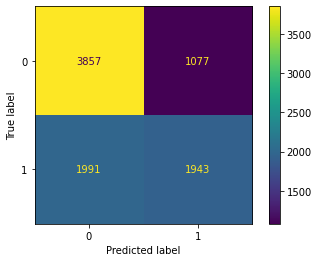

In [ ]:
plot_confusion_matrix(gbm,X_testc,y_testc)

Hyperparameter Grid for Tuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold

In [ ]:
params = {
        'min_child_weight': [5, 10, 15],
        'gamma': [1, 1.5, 2, 5, 8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(gbm, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_trainc,y_trainc), verbose=3, random_state=1001 )

In [ ]:
random_search.fit(X_trainc, y_trainc)
gbm_pred=random_search.predict(X_testc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
#classification report
print(metrics.classification_report(y_testc, gbm_pred, digits=3))

              precision    recall  f1-score   support

           0      0.670     0.771     0.717      4934
           1      0.646     0.524     0.579      3934

    accuracy                          0.661      8868
   macro avg      0.658     0.647     0.648      8868
weighted avg      0.659     0.661     0.656      8868



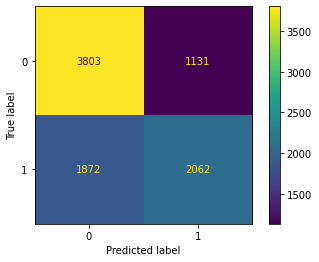

In [ ]:
plot_confusion_matrix(random_search,X_testc,y_testc)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([24.0903615 , 36.05182686, 35.83422871, 27.60828719, 29.19109077]), 'std_fit_time': array([0.32713836, 0.08435407, 0.191457  , 0.37037805, 6.29648176]), 'mean_score_time': array([0.0798769 , 0.12621312, 0.1262002 , 0.1239069 , 0.07343516]), 'std_score_time': array([0.00313514, 0.01127092, 0.00252035, 0.00355288, 0.02811985]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 5, 10, 10, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[8, 2, 1.5, 8, 1.5],
             mask=[False, False, False, False, False],
       fill_value='?',
    

# .

# .

# LogReg

In [ ]:
logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
logreg.fit(X_trainc, y_trainc)
y_predlog = logreg.predict(X_testc)
print(logreg.score(X_trainc, y_trainc))
print(logreg.score(X_testc, y_testc))


0.5784716516023007
0.5782589084348219


In [ ]:
y_pred_prob = logreg.predict_proba(X_testc)
a=pd.DataFrame(y_pred_prob,columns=['y0','y1'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
for i in range(10):
  a['pred'] = a['y0'].apply(lambda x: 0 if x >= (0.1*i) else 1)
  print(i, a[a['pred']==a['y']].shape, a[a['pred']!=a['y']].shape, a[a['pred']==0].shape)

0 (4934, 4) (3934, 4) (8868, 4)
1 (4934, 4) (3934, 4) (8866, 4)
2 (4940, 4) (3928, 4) (8858, 4)
3 (4951, 4) (3917, 4) (8817, 4)
4 (5012, 4) (3856, 4) (8250, 4)
5 (5128, 4) (3740, 4) (6510, 4)
6 (4656, 4) (4212, 4) (2238, 4)
7 (3945, 4) (4923, 4) (17, 4)
8 (3935, 4) (4933, 4) (5, 4)
9 (3934, 4) (4934, 4) (0, 4)


In [ ]:
a=pd.DataFrame(y_predlog,columns = ['pred'])
a['y']=pd.DataFrame(y_testc,columns = ['y'])['y']
a1=a[a['y']==0]
a2=a[a['y']==1]

print(a.shape, a[a['pred']==a['y']].shape, '\n', a1.shape, a1[a1['pred']==a1['y']].shape, '\n', a2.shape, a2[a2['pred']==a2['y']].shape)

(8868, 2) (5128, 2) 
 (4934, 2) (3852, 2) 
 (3934, 2) (1276, 2)


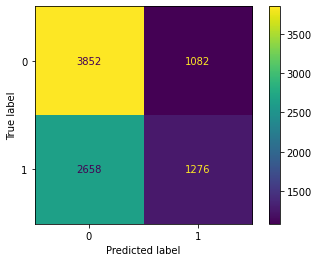

In [ ]:
plot_confusion_matrix(logreg, X_testc, y_testc)

In [ ]:
print(classification_report(y_testc, y_predlog))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67      4934
           1       0.54      0.32      0.41      3934

    accuracy                           0.58      8868
   macro avg       0.57      0.55      0.54      8868
weighted avg       0.57      0.58      0.55      8868



# .

# .

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_class=GaussianNB()
naive_class.fit(X_trainc, y_trainc)
naive_class_pred = naive_class.predict(X_testc)

In [ ]:
print(accuracy_score(y_testc,naive_class_pred))
print(f1_score(y_testc,naive_class_pred,average=None))

0.5728461885430762
[0.68417542 0.34029955]


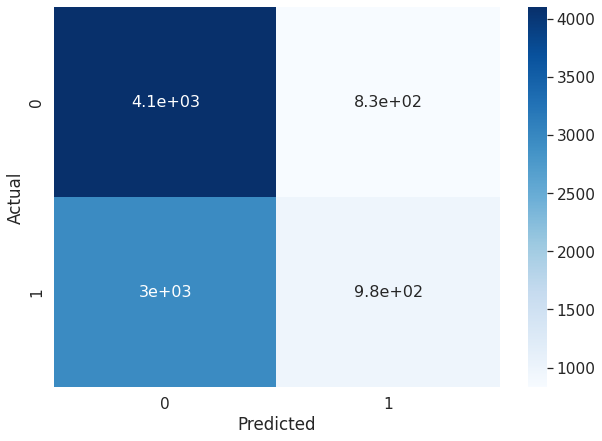

In [ ]:
data = confusion_matrix(y_testc,naive_class_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_testc), index = np.unique(y_testc))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_testc, naive_class_pred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      4934
           1       0.54      0.25      0.34      3934

    accuracy                           0.57      8868
   macro avg       0.56      0.54      0.51      8868
weighted avg       0.56      0.57      0.53      8868



In [ ]:
Model.append('Naive')
Accuracy.append(accuracy_score(y_testc,naive_class_pred))
F1Score.append(f1_score(y_testc,naive_class_pred,average=None))

# .

# .

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_trainc, y_trainc)
knn_pred = knn.predict(X_testc)

In [ ]:
print(accuracy_score(y_testc,knn_pred))
print(f1_score(y_testc,knn_pred,average=None))

0.560893098782138
[0.65715795 0.38946378]


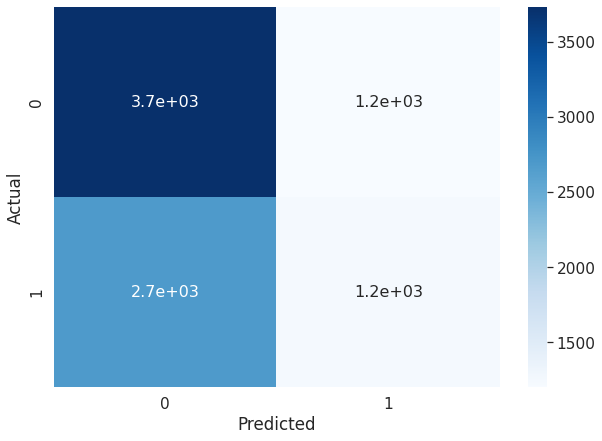

In [ ]:
data = confusion_matrix(y_testc,knn_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_testc), index = np.unique(y_testc))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_testc, knn_pred))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      4934
           1       0.51      0.32      0.39      3934

    accuracy                           0.56      8868
   macro avg       0.54      0.54      0.52      8868
weighted avg       0.55      0.56      0.54      8868



In [ ]:
Model.append('KNN')
Accuracy.append(accuracy_score(y_testc,knn_pred))
F1Score.append(f1_score(y_testc,knn_pred,average=None))

In [ ]:
compare_mod = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score,'Sensitivity':Sen,'Specificity':Spe,'FPR':FPR,'FNR':FNR})
compare_mod

NameError: ignored

# .

# .

# SVM

In [ ]:
linear_svm=svm.SVC(kernel='linear')
linear_svm.fit(X_trainc, y_trainc)
svm_pred = linear_svm.predict(X_testc)

accuracy 0.5873928732521425
Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.83      0.69      4934
           1       0.57      0.28      0.38      3934

    accuracy                           0.59      8868
   macro avg       0.58      0.56      0.53      8868
weighted avg       0.58      0.59      0.55      8868



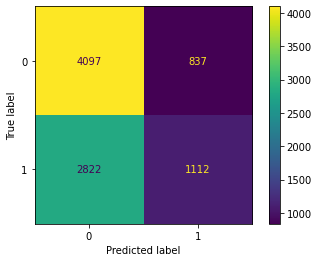

In [ ]:
predicted_linear_svm=linear_svm.predict(X_testc)
print("accuracy",accuracy_score(y_testc, predicted_linear_svm))
plot_confusion_matrix(linear_svm, X_testc, y_testc)

print("Classification Report \n", classification_report(y_testc, svm_pred))

In [ ]:
print("Accuracy:",accuracy_score(y_testc, predicted_linear_svm))
print('Precision: %.3f' % precision_score(y_testc, predicted_linear_svm))
print('Recall: %.3f' % recall_score(y_testc, predicted_linear_svm))
print('F1 Score: %.3f' % f1_score(y_testc, predicted_linear_svm))

Accuracy: 0.5873928732521425
Precision: 0.571
Recall: 0.283
F1 Score: 0.378


In [ ]:
from sklearn.svm import SVC

Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_trainc, y_trainc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.588 total time=20.3min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.584 total time=21.8min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.576 total time=20.6min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.582 total time=18.4min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.589 total time=20.1min
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.588 total time=20.2min
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.584 total time=21.7min
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.576 total time=20.7min
